<a href="https://colab.research.google.com/github/TongHere/Secom/blob/main/Boruta_KNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
# imputer
from sklearn.impute import SimpleImputer, KNNImputer


url1 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
names = ["feature" + str(x) for x in range(1, 591)]
df1 = pd.read_csv(url1,sep=" ", names=names, na_values = "NaN",header=None)
df1.head()

url2 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
df2 = pd.read_csv(url2,sep=" ",names = ["Result","Date"])

#df2.columns =['Pass/Fail','Date']
df2.head()


,Result,Date
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [ ]:
#Convertion of Date into Datetime from Object(String) data types
df2['Date'] = pd.to_datetime(df2['Date'])
df2.dtypes



#Joinig TWO df1 and df2 Dataframe naming SECOM
Secom = pd.concat([df1,df2],axis = 1)
print(Secom)

Secom = Secom.drop(['Date'],axis=1)
                   
# establish target and features of the manufacturing data
# set the target to the encoded manufacturing outcome column
y = Secom[['Result']]
# set the features as the rest of the dataset after dropping the features that are no
x = Secom.drop(['Result'], axis=1)

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)


      feature1  feature2   feature3   feature4  feature5  feature6  feature7  \
0      3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1      3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2      2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3      2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4      3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   
...        ...       ...        ...        ...       ...       ...       ...   
1562   2899.41   2464.36  2179.7333  3085.3781    1.4843     100.0   82.2467   
1563   3052.31   2522.55  2198.5667  1124.6595    0.8763     100.0   98.4689   
1564   2978.81   2379.78  2206.3000  1110.4967    0.8236     100.0   99.4122   
1565   2894.92   2532.01  2177.0333  1183.7287    1.5726     100.0   98.7978   
1566   2944.92   2450.76  2195.4444  2914.1792    1.5978     100.0   85.1011   

      feature8  feature9  feature10  ..

In [ ]:
#Splitting data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1,stratify = y)


# getting the counts
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)


#Removing features having Missing ratio more than 50%


def percentna(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isnull().sum()/len(dataframe))>threshold]
    return columns.tolist()

 

na_columns = percentna(x_train, 0.5)
len(na_columns)
x_train_dn = x_train.drop(na_columns, axis=1)
x_train_dn.shape


shape of x_train:  (1096, 590)
shape of x_test:  (471, 590)
shape of y_train:  (1096, 1)
shape of y_test:  (471, 1)


(1096, 566)

In [ ]:
print("shape of x_train: ", x_train.shape)

shape of x_train:  (1096, 590)


In [ ]:
x_train_df = pd.DataFrame(x_train)

In [ ]:
x_train_df.get_support()

AttributeError: ignored

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train_dn)
constant_columns = [column for column in x_train_dn.columns
                    if column not in x_train_dn.columns[var_thres.get_support()]]
print(len(constant_columns))
x_train_lv = x_train_dn.drop(constant_columns,axis=1)


116


In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
x_train_dn.columns[var_thres.get_support()]

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature7',
       'feature8', 'feature9', 'feature10', 'feature11',
       ...
       'feature577', 'feature578', 'feature583', 'feature584', 'feature585',
       'feature586', 'feature587', 'feature588', 'feature589', 'feature590'],
      dtype='object', length=450)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
y_train

,Result
1338,-1
982,-1
654,-1
56,-1
642,-1
...,...
669,-1
821,-1
213,-1
1556,-1


In [ ]:
y_trainPass = y_train[y_train['Result']==-1].count().sum()
y_trainPass

1023

In [ ]:
y_trainfail=y_train[y_train['Result']==1].count().sum()
y_trainfail

73

In [ ]:
y_testpass=y_test[y_test['Result']==-1].count().sum()
y_testpass

440

In [ ]:
y_testfail=y_test[y_test['Result']==1].count().sum()
y_testfail

31

# Seperate porpotionlly 

In [ ]:
y_train_data = [y_trainPass,y_trainfail]
def make_autopct(values):
  def my_autopct(pct): 
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
  return my_autopct

my_labels = 'pass: -1 ','fail: 1'
plt.pie(y_train_data ,labels=my_labels,autopct= make_autopct(y_train_data))
plt.title('Y_Train Dataset')
plt.show()

In [ ]:
y_test_data = [y_testpass,y_testfail]
def make_autopct(values):
  def my_autopct(pct): 
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
  return my_autopct

my_labels = 'pass: -1 ','fail: 1'
plt.pie(y_test_data ,labels =my_labels,autopct= make_autopct(y_test_data))
plt.title('Y_Test Dataset')
plt.show()

In [ ]:
#Low Variance Filter
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train_dn)

 

constant_columns = [column for column in x_train_dn.columns
                    if column not in x_train_dn.columns[var_thres.get_support()]]


print(len(constant_columns))

x_train_lv = x_train_dn.drop(constant_columns,axis=1)

116


In [ ]:
x_test_drop = x_test.copy()

x_test_drop = x_test_drop.drop(na_columns, axis=1)

x_test_drop = x_test_drop.drop(constant_columns,axis=1)

In [ ]:
def IQR_outliers(data,limit=1.5):
    numColumns = data.select_dtypes(include=np.number).columns.tolist(); # extract list of numeric columns
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1;
    outliers=((data[numColumns] < (Q1 - limit*IQR)) | (data[numColumns] > (Q3 + limit*IQR))).sum()*100/data.shape[0]
    return outliers 
from sklearn.preprocessing import QuantileTransformer
x_train_lv = x_train_lv.copy()
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state= 42)
df_outliers = pd.DataFrame(quantile_transformer.fit_transform(x_train_lv),columns=x_train_lv.columns)
outliers = IQR_outliers(df_outliers)

In [ ]:
numColumns = df_outliers.select_dtypes(include=np.number).columns.tolist();

In [ ]:
# initialize imputer
imputer = KNNImputer()

# fit the imputer on X_train. pass only numeric columns.
imputer.fit(df_outliers[numColumns])

# transform the data using the fitted imputer
X_train_knn_impute2 = imputer.transform(df_outliers[numColumns])
X_test_knn_impute2 = imputer.transform(x_test_drop[numColumns])

# put the output into DataFrame. remember to pass columns used in fit/transform
X_train_knn_impute2 = pd.DataFrame(X_train_knn_impute2, columns=numColumns)
X_test_knn_impute2 = pd.DataFrame(X_test_knn_impute2, columns=numColumns)

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train_knn_impute2), np.array(y_train)) 

# Ranking of Boruta

print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

selected_rf_features = pd.DataFrame({'Feature':list(X_train_knn_impute2.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking').head(30)

# Using the BorutaPy object to transform the features in the dataset.

X_Filtered_train = boruta_selector.transform(np.array(X_train_knn_impute2))

X_Filtered_test = boruta_selector.transform(np.array(X_test_knn_impute2)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	436
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	436
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	436
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	436
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	13
Rejected: 	436
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	13
Rejected: 	436
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	13
Rejected: 	436
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	13
Rejected: 	436
Iteration: 	16 / 100
Confirmed: 	3
Tentat

In [ ]:
X_Filtered_train

array([[-0.23808933, -0.94511451,  0.69685712, ...,  0.34516489,
        -1.22082287, -0.77849802],
       [ 0.97748656, -0.35729428,  0.13286416, ...,  0.44449792,
         0.19186514,  0.06905612],
       [-0.26398459, -0.20598136, -0.01871642, ...,  0.05234484,
        -0.71198111,  1.30011042],
       ...,
       [ 1.09327227,  1.10705935,  1.53287054, ...,  0.53482336,
         0.78674453, -0.09846853],
       [-1.38462826, -0.81614989,  0.57311539, ..., -0.522837  ,
         0.50920204,  0.06905612],
       [-0.08415533, -0.14103629, -0.08259387, ..., -1.49838614,
         0.87535389, -2.86556794]])

In [ ]:
y_train_df=pd.DataFrame(y_train)

In [ ]:
X_Filtered_train_df=pd.DataFrame(X_Filtered_train)
X_Filtered_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.238089,-0.945115,0.696857,0.832929,-0.809168,-1.210137,-0.251016,-0.805692,-1.301191,-0.509292,0.345165,-1.220823,-0.778498
1,0.977487,-0.357294,0.132864,-0.548120,0.032625,0.139710,-0.828465,0.031588,-1.154615,1.433192,0.444498,0.191865,0.069056
2,-0.263985,-0.205981,-0.018716,-0.057026,0.871679,-0.700711,-0.423855,0.880657,1.831224,-1.325146,0.052345,-0.711981,1.300110
3,0.123259,1.551572,-0.748653,-0.661163,0.105580,-2.030464,1.541796,0.101136,1.247505,-1.343984,0.006462,-2.109541,-0.341628
4,-0.532190,0.144857,-0.392793,-0.563189,1.159515,-0.700711,0.174005,1.161975,1.066304,-0.802447,1.231229,-0.711981,-0.170076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0.203379,0.526992,-0.874770,-1.045445,-0.334851,-1.349498,0.519225,-0.328463,0.104318,-0.901429,-0.349604,-1.421556,-1.057450
1092,1.104747,0.456966,-0.781580,-1.035557,-1.283836,0.608973,-0.691121,-1.321806,-0.295296,0.403340,0.664439,0.673702,-1.989635
1093,1.093272,1.107059,1.532871,1.464449,1.181921,0.810910,0.570161,1.165034,0.914679,1.933950,0.534823,0.786745,-0.098469
1094,-1.384628,-0.816150,0.573115,0.578017,0.483658,0.434861,0.400877,0.475275,0.265284,-1.053416,-0.522837,0.509202,0.069056


# X_train Dataset Describetion

In [ ]:
X_Filtered_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.004623,0.000495,-0.001767,-0.001684,-0.000270,-0.000609,0.000936,-0.000132,0.002430,-0.000019,0.001040,-0.000712,-0.025983
std,1.066259,1.016217,1.017223,1.016357,1.018145,1.064862,1.013362,1.017807,1.041507,1.018465,1.017450,1.065085,0.949070
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.676854,-0.670764,-0.673657,-0.673801,-0.678433,-0.648724,-0.668987,-0.673782,-0.669778,-0.674261,-0.673728,-0.665852,-0.643840
50%,0.001255,0.000608,-0.000900,-0.003650,0.005018,0.005018,-0.003764,-0.001236,0.000000,0.000019,0.000836,-0.001255,0.069056
75%,0.670557,0.669462,0.670618,0.671240,0.664287,0.675277,0.662726,0.673002,0.672526,0.674517,0.675685,0.673702,0.556177
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


#Volatility

In [ ]:
return_data = X_Filtered_train_df.pct_change()
volatility = return_data.std()
type_volatility=volatility.to_dict()
# type_volatility

In [ ]:
volatility_vt=pd.DataFrame(type_volatility, index=["volatility"])
volatility_vt

,0,1,2,3,4,5,6,7,8,9,10,11,12
volatility,45.443396,41.753274,32.400087,70.367546,28.159363,19.928248,17.599576,183.321399,NaN,65.973582,38.827637,65.86213,12.496331


In [ ]:
x=volatility_vt.keys().values.tolist()
y=volatility_vt.iloc[0]
plt.subplots(figsize=(10,10))
plt.bar(x,y,width=1)
plt.show()


In [ ]:
from scipy.stats import norm
sns.kdeplot(volatility_vt.iloc[0], shade=True, bw=0.5, color="turquoise")
plt.show()

In [ ]:
# Volatility with standardisation
plt.figure(figsize=(18, 10))
volatility=X_Filtered_train_df.pct_change().apply(lambda x: np.log(1+x)).std().hist(bins=30)
plt.xlabel('Volatility',fontweight ="bold")
plt.ylabel('Number of features',fontweight ="bold")

Text(0, 0.5, 'Number of features')

In [ ]:
X_Filtered_train_df

TypeError: ignored

In [ ]:
import statistics

In [ ]:
>>> def variance(data):
...     # Number of observations
...     n = len(data)
...     # Mean of the data
...     mean = sum(data) / n
...     # Square deviations
...     deviations = [(x - mean) ** 2 for x in data]
...     # Variance
...     variance = sum(deviations) / n
...     return variance
...

>>> variance(X_Filtered_train_df.iloc[:])

0.5829960342133111

In [ ]:
X_Filtered_train_df.iloc[:]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.238089,-0.945115,0.696857,0.832929,-0.809168,-1.210137,-0.251016,-0.805692,-1.301191,-0.509292,0.345165,-1.220823,-0.778498
1,0.977487,-0.357294,0.132864,-0.548120,0.032625,0.139710,-0.828465,0.031588,-1.154615,1.433192,0.444498,0.191865,0.069056
2,-0.263985,-0.205981,-0.018716,-0.057026,0.871679,-0.700711,-0.423855,0.880657,1.831224,-1.325146,0.052345,-0.711981,1.300110
3,0.123259,1.551572,-0.748653,-0.661163,0.105580,-2.030464,1.541796,0.101136,1.247505,-1.343984,0.006462,-2.109541,-0.341628
4,-0.532190,0.144857,-0.392793,-0.563189,1.159515,-0.700711,0.174005,1.161975,1.066304,-0.802447,1.231229,-0.711981,-0.170076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0.203379,0.526992,-0.874770,-1.045445,-0.334851,-1.349498,0.519225,-0.328463,0.104318,-0.901429,-0.349604,-1.421556,-1.057450
1092,1.104747,0.456966,-0.781580,-1.035557,-1.283836,0.608973,-0.691121,-1.321806,-0.295296,0.403340,0.664439,0.673702,-1.989635
1093,1.093272,1.107059,1.532871,1.464449,1.181921,0.810910,0.570161,1.165034,0.914679,1.933950,0.534823,0.786745,-0.098469
1094,-1.384628,-0.816150,0.573115,0.578017,0.483658,0.434861,0.400877,0.475275,0.265284,-1.053416,-0.522837,0.509202,0.069056


In [ ]:
boxplot(X_Filtered_train_df[:])


NameError: ignored

In [ ]:
import seaborn as sb 
sb.boxplot( data = X_Filtered_train_df, orient="w")
plt.show()

In [ ]:
X_Filtered_train_df.boxplot(ax=None,showmeans=False, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)
plt.plot()

[]

In [ ]:
X_Filtered_train_df.var()

#Variance

In [ ]:
X_Filtered_train_df.var()

0     1.136909
1     1.032697
2     1.034742
3     1.032982
4     1.036620
5     1.133931
6     1.026902
7     1.035931
8     1.084737
9     1.037270
10    1.035205
11    1.134407
12    0.900734
dtype: float64

In [ ]:
variance(X_Filtered_train_df)

0.5829960342133111

# Shapiro

In [ ]:
def get_shapiro_for_col(df, col_name):
  return shapiro(df[df[col_name].notnull()][col_name])

In [ ]:
shapiro_test_value_dict = dict()
shapiro_p_value_dict = dict()
for col in X_Filtered_train_df.columns:
  test_value, p_value = get_shapiro_for_col(X_Filtered_train_df, col)
  print(col, test_value, p_value)
  shapiro_test_value_dict[col] = test_value
  shapiro_p_value_dict[col] = p_value

0 0.9703044295310974 3.426837128948576e-14
1 0.9948574304580688 0.0008674250566400588
2 0.9948306083679199 0.0008300092886202037
3 0.9948607683181763 0.0008722310303710401
4 0.9947250485420227 0.0006981990882195532
5 0.9703893065452576 3.617552018033744e-14
6 0.9946455955505371 0.000613456591963768
7 0.9949078559875488 0.0009426954784430563
8 0.9829992055892944 5.162223426502521e-10
9 0.9949275851249695 0.0009739171946421266
10 0.9949009418487549 0.0009319772361777723
11 0.970444917678833 3.748588692600342e-14
12 0.9796609282493591 2.8779255020761063e-11


In [ ]:
Shapiro=pd.DataFrame(shapiro_p_value_dict,index=["Shapiro"])

In [ ]:
sum(Shapiro.iloc[0]<0.05)

13

In [ ]:
sum(Shapiro.iloc[0]>0.05)

0

In [ ]:
from scipy.stats import skew
dataFrame = pd.DataFrame(data=X_Filtered_train_df,);
skewValue = dataFrame.skew(axis=0)
skew_dict = skewValue.to_dict()
skew_dict

{0: 0.16818109720539554,
 1: -0.002941540373854132,
 2: -0.001194545585064396,
 3: 0.004002207473751534,
 4: -0.00345237505457205,
 5: 0.0018928583218042285,
 6: -0.001811296068566578,
 7: -0.0010199027683003964,
 8: 0.08700536915036698,
 9: -0.0008096050401814646,
 10: -0.0022980026035707957,
 11: 0.0009556047733647182,
 12: 0.05815240767057369}

#Skewness

In [ ]:
skewness=pd.DataFrame(skew_dict,index=["skewness"])
skewness

,0,1,2,3,4,5,6,7,8,9,10,11,12
skewness,0.168181,-0.002942,-0.001195,0.004002,-0.003452,0.001893,-0.001811,-0.00102,0.087005,-0.00081,-0.002298,0.000956,0.058152


In [ ]:
sum((skewness.iloc[0]>-0.5) & (skewness.iloc[0]<0.5))
#approximately symmetric

13

In [ ]:
sum((skewness.iloc[0]>-1) & (skewness.iloc[0]<-0.5)|(skewness.iloc[0]>0.5) & (skewness.iloc[0]<1))
#moderatedly skewed

0

In [ ]:
sum((skewness.iloc[0]<-1) | (skewness.iloc[0]>1))
#highly skewed 

0

# Histogram 

In [ ]:
sns.distplot(X_Filtered_train_df, bins=10, kde=False)

# Disturbution of Features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63906f9dd0>,
      dtype=object)

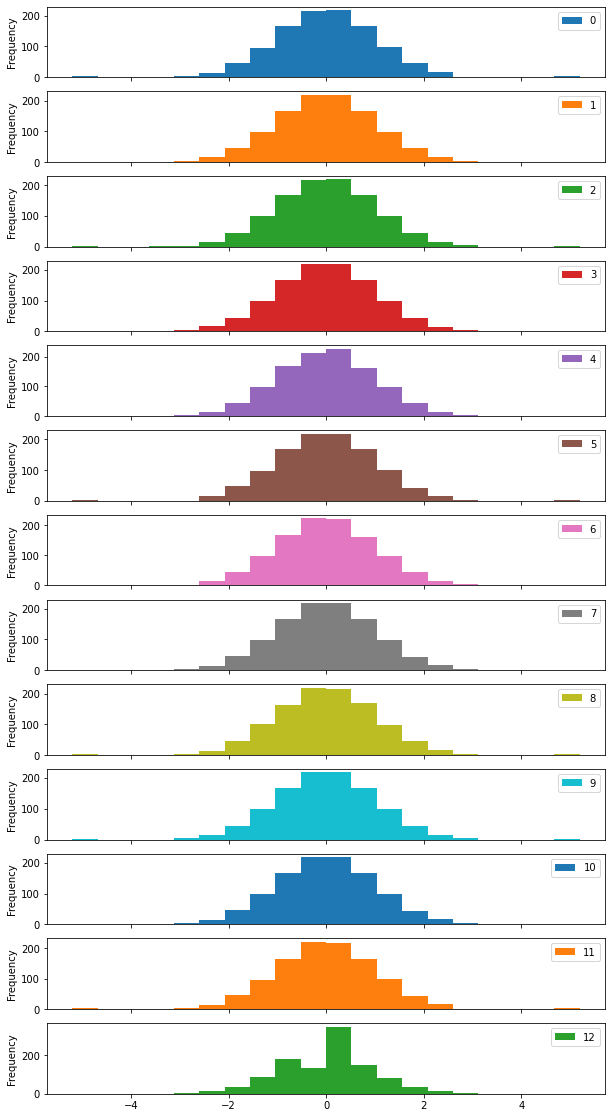

In [ ]:
X_Filtered_train_df.plot.hist(subplots=True, figsize=(10, 20), bins=20)

# PairPlot

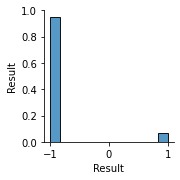

In [ ]:
sns.pairplot(y_train_df,kind="scatter")

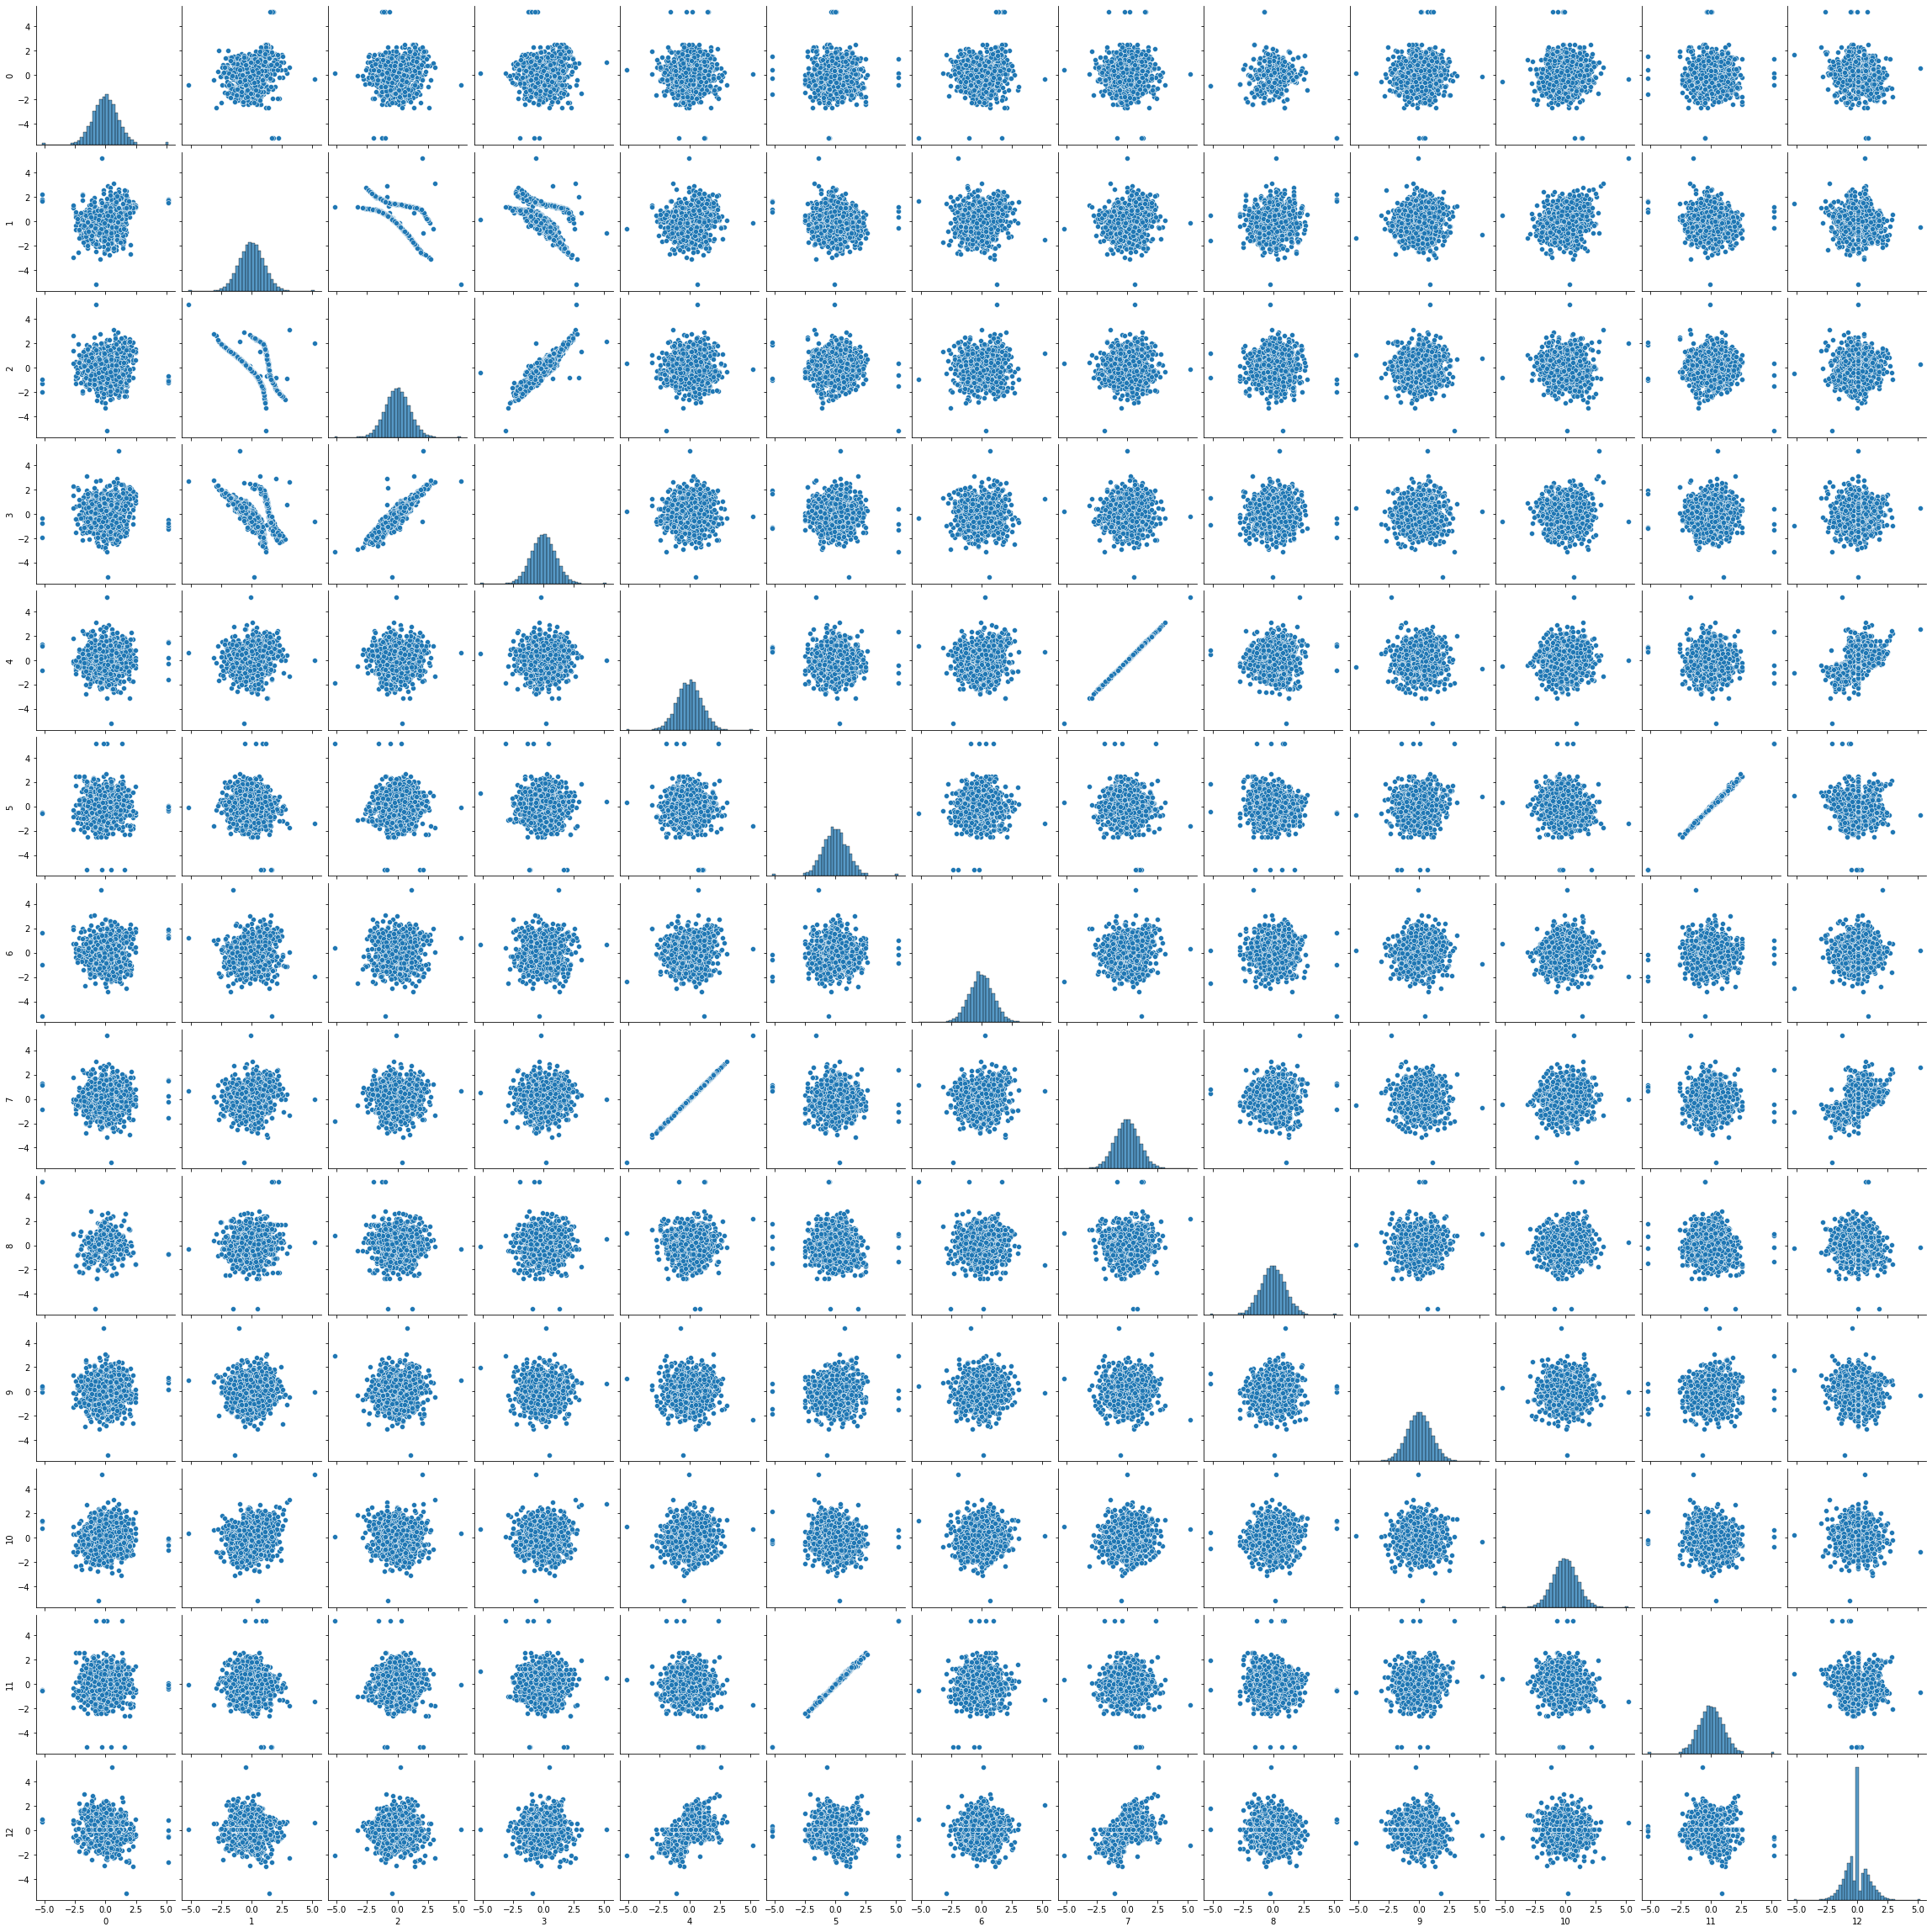

In [ ]:
sns.pairplot(X_Filtered_train_df,kind="scatter")

# Correlation 

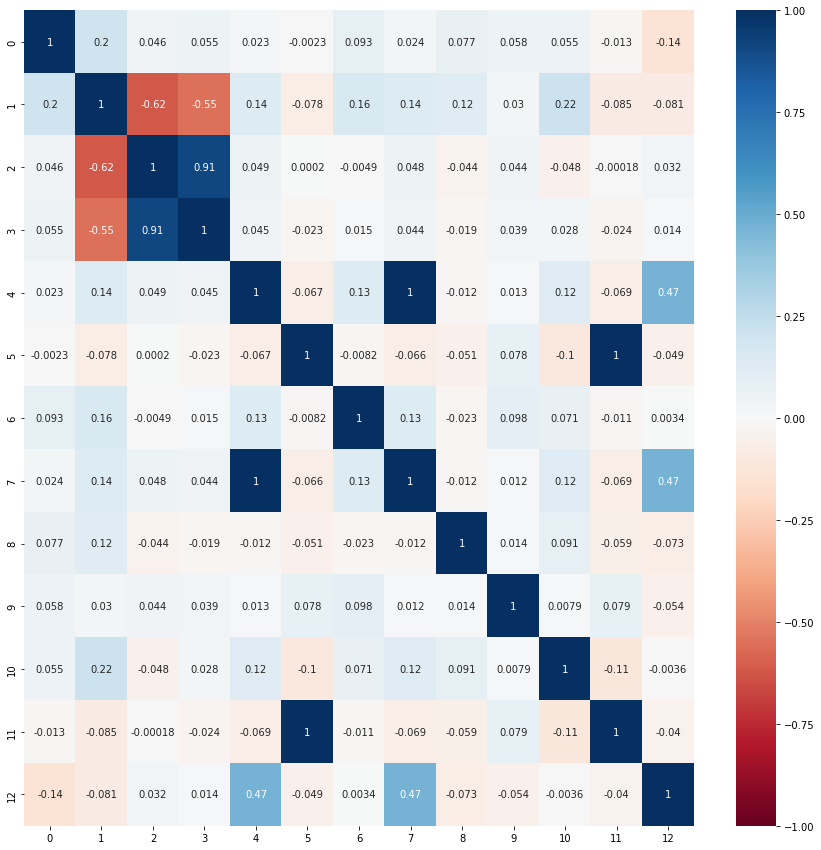

In [ ]:
correlation = X_Filtered_train_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation,cmap="RdBu",vmin=-1,vmax=1,annot=True)
#threhold